# Introduction to Convulutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self driving car recognizing the car in front.


## Get the data

The images we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/datasets/dansbecker/food-101

However we've modified it to only use two classes (pizza & steak) using the image data modification notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

> 🔑**Note:** We start with a smaller dataset se we can experiment quickly and figure what works (or better yet what doesn't work) before scaling up.

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded  file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-09-26 13:12:27--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.130.207, 74.125.68.207, 64.233.170.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.130.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  23.2MB/s    in 5.8s    

2023-09-26 13:12:33 (18.1 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)
A very crucial step at the beginning of any machine learning project is becoming one with the data. This usually means plenty of visualizing and folder scanning to understand the data you're working with.


In [2]:
!ls pizza_steak


test  train


In [3]:
!ls pizza_steak/train

pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [6]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images, first let's get the class names programmatically

In [7]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Create a list of class_names from the subdirectory
class_names


array(['pizza', 'steak'], dtype='<U5')

In [8]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder=target_dir + "/" + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder),1)

  # Read in the image and plot it using matplotlib
  img=mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


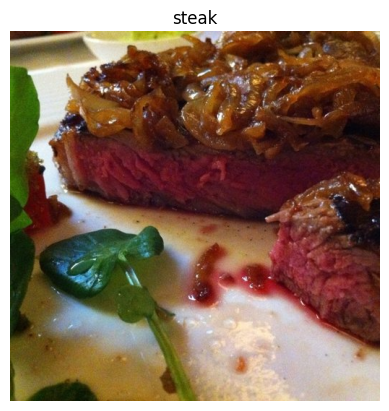

In [9]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train",
                        target_class="steak")

In [10]:
# The images we've imported and plotted are actually giant arrays/tensors of different pixel values
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 82,  46,  20],
        [ 80,  44,  18],
        [ 79,  43,  19],
        ...,
        [205, 192, 148],
        [201, 188, 143],
        [199, 186, 141]],

       [[ 78,  42,  16],
        [ 78,  42,  16],
        [ 78,  42,  18],
        ...,
        [222, 209, 165],
        [220, 207, 162],
        [214, 201, 156]],

       [[ 78,  40,  17],
        [ 79,  41,  18],
        [ 79,  41,  20],
        ...,
        [241, 228, 183],
        [234, 223, 178],
        [223, 212, 167]],

       ...,

       [[ 63,  76,   7],
        [ 61,  72,   4],
        [ 62,  71,   6],
        ...,
        [216, 203, 186],
        [222, 206, 190],
        [226, 210, 194]],

       [[ 63,  76,   6],
        [ 70,  81,  12],
        [ 71,  80,  13],
        ...,
        [216, 203, 184],
        [224, 209, 190],
        [228, 213, 194]],

       [[ 55,  68,   0],
        [ 72,  84,  12],
        [ 75,  84,  17],
        ...,
        [219, 206, 18

In [11]:
# View the image shape
img.shape # returns width, height, colour channels

(512, 512, 3)

🔑**Note:** As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 & 1. Knowing this, one of the most common pre-processing steps for working with images is to scale (also referred to as **normalize**) their pixel values by dividing the image arrays by 255 (since 255 is the maximum pixel value).


In [12]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.32156863, 0.18039216, 0.07843137],
        [0.31372549, 0.17254902, 0.07058824],
        [0.30980392, 0.16862745, 0.0745098 ],
        ...,
        [0.80392157, 0.75294118, 0.58039216],
        [0.78823529, 0.7372549 , 0.56078431],
        [0.78039216, 0.72941176, 0.55294118]],

       [[0.30588235, 0.16470588, 0.0627451 ],
        [0.30588235, 0.16470588, 0.0627451 ],
        [0.30588235, 0.16470588, 0.07058824],
        ...,
        [0.87058824, 0.81960784, 0.64705882],
        [0.8627451 , 0.81176471, 0.63529412],
        [0.83921569, 0.78823529, 0.61176471]],

       [[0.30588235, 0.15686275, 0.06666667],
        [0.30980392, 0.16078431, 0.07058824],
        [0.30980392, 0.16078431, 0.07843137],
        ...,
        [0.94509804, 0.89411765, 0.71764706],
        [0.91764706, 0.8745098 , 0.69803922],
        [0.8745098 , 0.83137255, 0.65490196]],

       ...,

       [[0.24705882, 0.29803922, 0.02745098],
        [0.23921569, 0.28235294, 0.01568627],
        [0.24313725, 0

# An end-to-end eample

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1)
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir="/content/pizza_steak/train"
test_dir="pizza_steak/test"

# Import data from directoris and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                              batch_size=32,
                                              target_size=(224,224),
                                              class_mode="binary",
                                              seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                              batch_size=32,
                                              target_size=(224,224),
                                              class_mode="binary",
                                              seed=42)

# Build a CNN model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")

])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 20s 157ms/step - loss: 0.5437 - accuracy: 0.7227 - val_loss: 0.4882 - val_accuracy: 0.7460
Epoch 2/5
47/47 [==============================] - 6s 127ms/step - loss: 0.4281 - accuracy: 0.8087 - val_loss: 0.3410 - val_accuracy: 0.8700
Epoch 3/5
47/47 [==============================] - 6s 131ms/step - loss: 0.3843 - accuracy: 0.8360 - val_loss: 0.3881 - val_accuracy: 0.8080
Epoch 4/5
47/47 [==============================] - 6s 122ms/step - loss: 0.3473 - accuracy: 0.8520 - val_loss: 0.3044 - val_accuracy: 0.8780
Epoch 5/5
47/47 [==============================] - 6s 135ms/step - loss: 0.3136 - accuracy: 0.8700 - val_loss: 0.2938 - val_accuracy: 0.9040


In [14]:
# Get model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

# Trying a non-CNN model

Let's replicate the model we've built in the previous section to see if it works with our image data

In [15]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 132ms/step - loss: 1.2026 - accuracy: 0.4980 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 5s 110ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 5s 109ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 176ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 5s 110ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [16]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Despite having 20x more parameters than our CNN (model_1), model_2 performs terribly...Let's try improving it

In [17]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 114ms/step - loss: 3.8402 - accuracy: 0.6313 - val_loss: 0.8389 - val_accuracy: 0.7380
Epoch 2/5
47/47 [==============================] - 6s 122ms/step - loss: 0.8243 - accuracy: 0.7047 - val_loss: 0.5157 - val_accuracy: 0.7780
Epoch 3/5
47/47 [==============================] - 5s 112ms/step - loss: 0.5941 - accuracy: 0.7413 - val_loss: 0.5916 - val_accuracy: 0.7400
Epoch 4/5
47/47 [==============================] - 6s 127ms/step - loss: 0.7616 - accuracy: 0.7133 - val_loss: 0.5403 - val_accuracy: 0.7360
Epoch 5/5
47/47 [==============================] - 5s 110ms/step - loss: 0.5094 - accuracy: 0.7827 - val_loss: 0.4474 - val_accuracy: 0.7740


In [18]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


> 🔑 Note: You can think of trainable parameters as patterns a model can learn from data. Intuitiely, you might think more is better. And in some cases it is. But in this case, the difference here is in the two different styles of model we're using. Where a series of dense layers have a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, a convolutional neural network seeks to sort out and learn the most important patterns in an image. So even though there are less learnable parameters in our convolutional neural network, these are often more helpful in decphering between different features in an image.

## Binary Classification: Let's break it down

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing and turning our data into batches)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment,experiment,experiment)

### 1. Becoming one with data

Image shape: (287, 512, 3)
Image shape: (512, 384, 3)


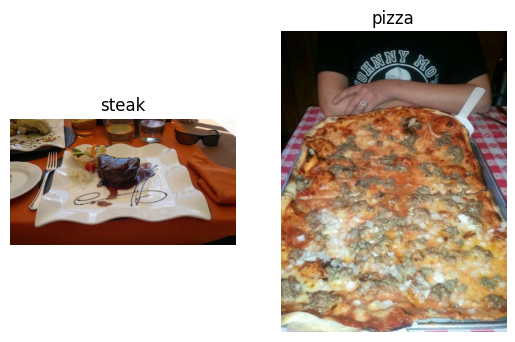

In [19]:
# Visualize data
plt.figure()
plt.subplot(1,2,1)
steak_img=view_random_image("pizza_steak/train","steak")
plt.subplot(1,2,2)
pizza_img=view_random_image("pizza_steak/train","pizza")


### 2. Preprocess the data (prepare it for model)

In [20]:
# Define directory dataset paths
train_dir="pizza_steak/train/"
test_dir="pizza_steak/test/"

Our next step is to turn our data into batches

A batch is a small subset of the dataset a model looks at during training. For example, rather than looking at 10,000 images at one time and trying to figure out the patterns, a model might only look at 32 images at a time.

It does this for a couple of reasons:

1. 10,000 images (or more) might not fit into the memory of your processor (GPU).
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

In [21]:
!nvidia-smi

Tue Sep 26 13:14:52 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P0    28W /  70W |   2927MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [22]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)


In [23]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [24]:
# Get a sample of a train data batch
images, labels = train_data.next() # get the "next" batch of images/labels
len(images), len(labels)

(32, 32)

In [25]:
# How many batches are there?
len(train_data)

47

In [26]:
round(1500/32)

47

In [27]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.48627454, 0.42352945, 0.36078432],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.82745105, 0.7137255 , 0.48627454],
          [0.8431373 , 0.7372549 , 0.5294118 ],
          [0.87843144, 0.77647066, 0.58431375]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.49803925],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.4901961 ],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.77647

In [28]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

# Create a CNN model (start with a baseline)
A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep eperimenting, you try to beat the baseline

> 🔑 Note: In deep learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best in the field for your problem)

In [29]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [30]:
# Create the model (this will be our baseline, a layer convolutional network)
model_4 = Sequential([
    Conv2D(filters=10, # filter is the number of sliding windows going across an input (higher = more complex model)
           kernel_size=3, # the size of the sliding window going across an input
           strides=1, # the size of the step the sliding window takes across an input
           padding="valid",
           activation = "relu",
           input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    Flatten(),
    Dense(1,activation="sigmoid")
])



In [31]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [32]:
# Get a summary of our model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Fit the model

In [33]:
# Check the lengths of training and test generators
len(train_data), len(test_data)

(47, 16)

In [34]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 143ms/step - loss: 0.5844 - accuracy: 0.7040 - val_loss: 0.3787 - val_accuracy: 0.8300
Epoch 2/5
47/47 [==============================] - 6s 124ms/step - loss: 0.3701 - accuracy: 0.8513 - val_loss: 0.4427 - val_accuracy: 0.7860
Epoch 3/5
47/47 [==============================] - 6s 131ms/step - loss: 0.2257 - accuracy: 0.9233 - val_loss: 0.3818 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 7s 139ms/step - loss: 0.0849 - accuracy: 0.9840 - val_loss: 0.4584 - val_accuracy: 0.8160
Epoch 5/5
47/47 [==============================] - 6s 122ms/step - loss: 0.0261 - accuracy: 0.9953 - val_loss: 0.4857 - val_accuracy: 0.8320


## Evaluating our model

It looks like our model is learning something, let's evaluate it

<Axes: >

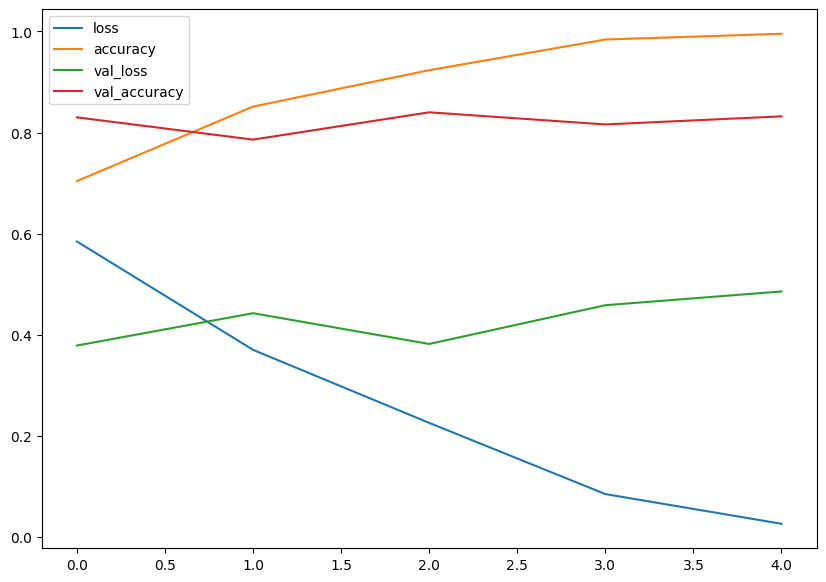

In [35]:
# Let's plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [36]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  returns separate loss curves for training and validation metrics
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # How many epochs did we run for?

  # Plot loss
  plt.plot(epochs,accuracy,label="training_accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()


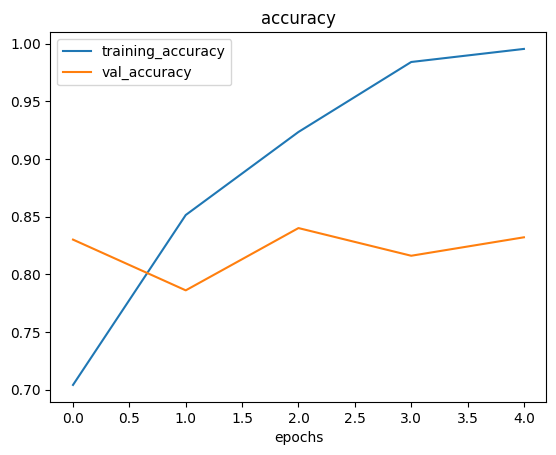

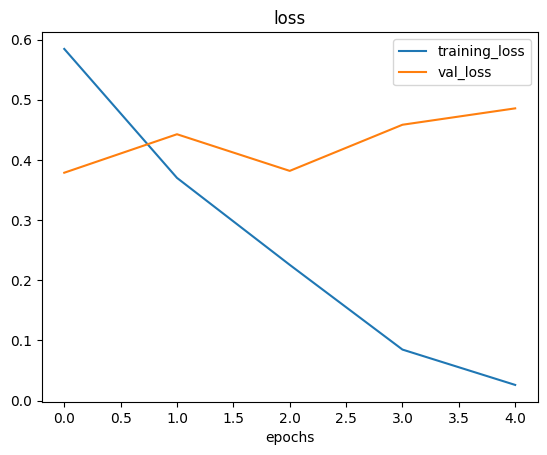

In [37]:
plot_loss_curves(history_4)

> 🔑 **Note:** When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset. This means, it's learning the patterns in the training dataset **too well** and thus the model's ability to generalize to unseen data will be diminished

# Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data...

> 🔑**Note:** Reducing overfitting is also known as **regularization**


In [38]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [39]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [40]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 146ms/step - loss: 0.6298 - accuracy: 0.6627 - val_loss: 0.4894 - val_accuracy: 0.7940
Epoch 2/5
47/47 [==============================] - 5s 117ms/step - loss: 0.4696 - accuracy: 0.7900 - val_loss: 0.4410 - val_accuracy: 0.8040
Epoch 3/5
47/47 [==============================] - 6s 129ms/step - loss: 0.4299 - accuracy: 0.8000 - val_loss: 0.3887 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 6s 132ms/step - loss: 0.3897 - accuracy: 0.8273 - val_loss: 0.3351 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 5s 115ms/step - loss: 0.3648 - accuracy: 0.8400 - val_loss: 0.3284 - val_accuracy: 0.8720


In [41]:
# Get a summary of our model with max pooling
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 26, 26, 10)       

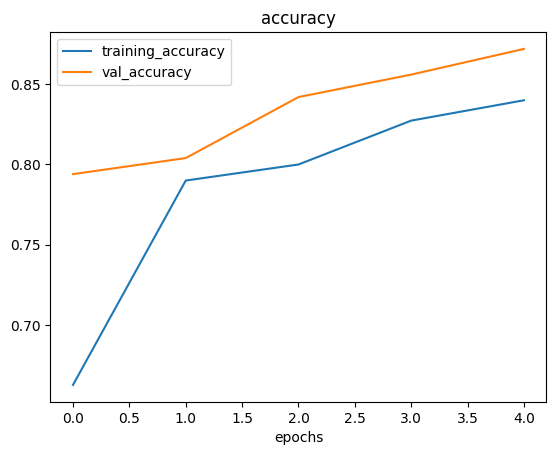

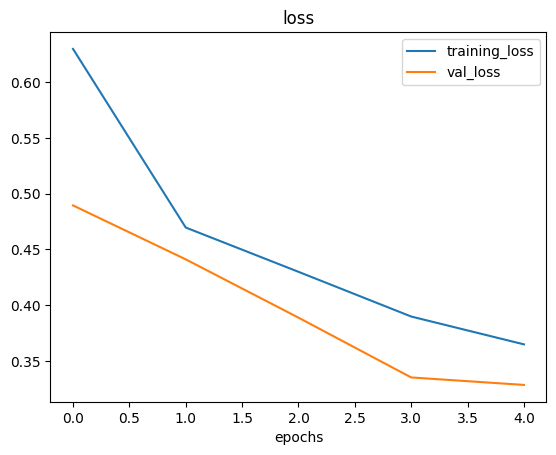

In [42]:
# Plot loss curves
plot_loss_curves(history_5)

# Opening our bag of tricks and finding data augmentation

In [43]:
# Create ImageDatagenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

> 🤔
**Question:** What is data augmentation?

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Let's write some code to visualize data augmentation...

In [44]:
# Import data and augment it from training directory
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(directory = train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False) # for demonstration purposes only

# Create non-augmented train data batches
print("Non-Augmented training data:")
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False
                                               )


# Create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="binary")

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


> 🔑**Note:** Data augmentation is usually only performed on the training data. Using `ImageDataGenerator`built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model

Finally...let's visualize some augmented data!!!

In [45]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() #note: labels aren't augmented...only data (images)


showing image number: 14


(-0.5, 223.5, 223.5, -0.5)

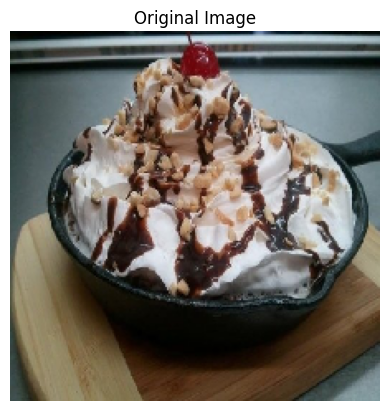

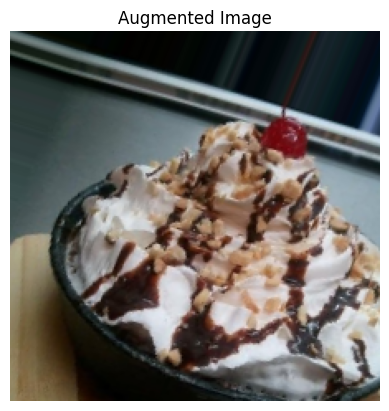

In [46]:
# Show original image and augmented image
import random
random_number = random.randint(0,31) # out batch sizes are 32...
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("Augmented Image")
plt.axis(False)


Now we've seen what augmented training data looks like, let's build a model and see how it learns on augmented data.

In [47]:
# Create a model (same as model_5)
model_6 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # Fitting model_6 on augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 24s 442ms/step - loss: 0.7366 - accuracy: 0.4720 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 30s 638ms/step - loss: 0.6938 - accuracy: 0.4667 - val_loss: 0.6927 - val_accuracy: 0.5560
Epoch 3/5
47/47 [==============================] - 22s 475ms/step - loss: 0.7114 - accuracy: 0.5407 - val_loss: 0.6921 - val_accuracy: 0.5820
Epoch 4/5
47/47 [==============================] - 22s 479ms/step - loss: 0.6964 - accuracy: 0.5073 - val_loss: 0.6907 - val_accuracy: 0.5020
Epoch 5/5
47/47 [==============================] - 22s 453ms/step - loss: 0.6932 - accuracy: 0.5247 - val_loss: 0.6922 - val_accuracy: 0.6460


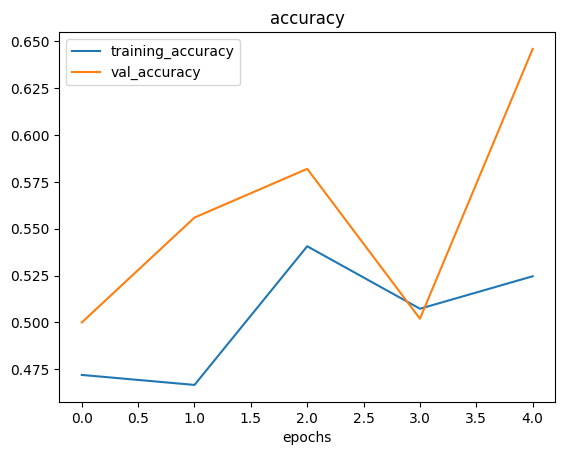

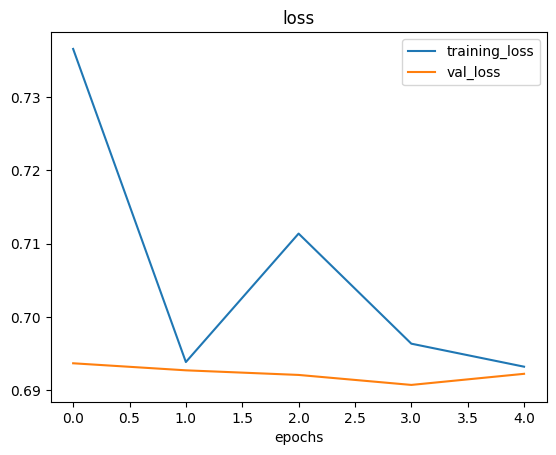

In [48]:
# Check our model's training curves
plot_loss_curves(history_6)

Let's shuffle our augmented training data and train another model (the same as before) on it and see what happens

In [49]:
# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True)

Found 1500 images belonging to 2 classes.


In [50]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 467ms/step - loss: 0.6348 - accuracy: 0.6427 - val_loss: 0.5002 - val_accuracy: 0.7640
Epoch 2/5
47/47 [==============================] - 22s 464ms/step - loss: 0.5654 - accuracy: 0.7093 - val_loss: 0.4405 - val_accuracy: 0.8080
Epoch 3/5
47/47 [==============================] - 22s 467ms/step - loss: 0.5315 - accuracy: 0.7267 - val_loss: 0.4526 - val_accuracy: 0.7860
Epoch 4/5
47/47 [==============================] - 21s 447ms/step - loss: 0.4897 - accuracy: 0.7727 - val_loss: 0.3541 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 25s 528ms/step - loss: 0.4872 - accuracy: 0.7647 - val_loss: 0.3505 - val_accuracy: 0.8740


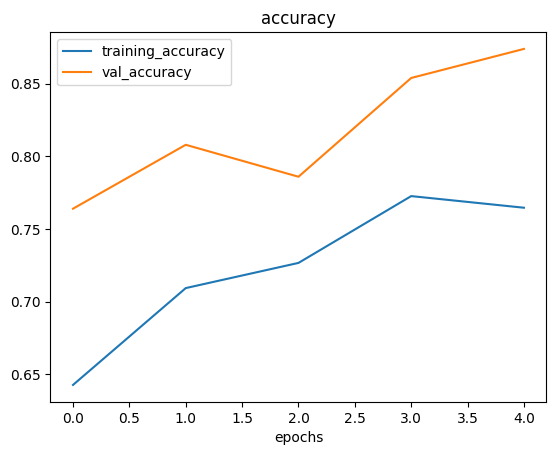

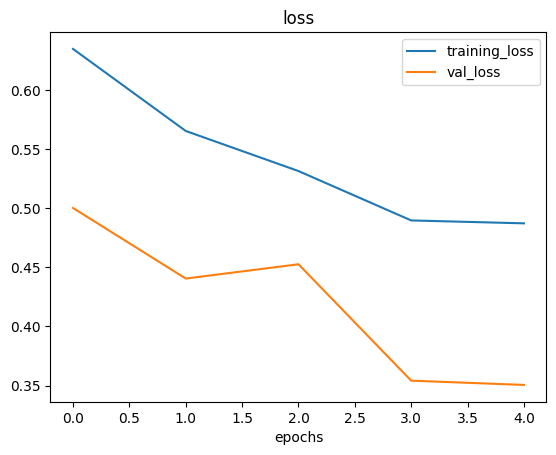

In [51]:
# Plot the loss curve
plot_loss_curves(history_7)

> 🔑**Note:** When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images (in our case, pizza & steak at the same time instead of just pizza then steak)

## Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could try to continue to imporve our model:

* Increase the number of model layers (e.g. add more `Conv2D`/`MaxPool2D` layers)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning data
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has leant and adjust it to our own use


In [52]:
# Create a CNN model (same as Tiny VGG but for binary classification - https://poloclub.github.io/cnn-explainer/ )
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # same input shape as our images
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 30s 566ms/step - loss: 0.6359 - accuracy: 0.6360 - val_loss: 0.5208 - val_accuracy: 0.7320
Epoch 2/5
47/47 [==============================] - 24s 522ms/step - loss: 0.5133 - accuracy: 0.7567 - val_loss: 0.3501 - val_accuracy: 0.8540
Epoch 3/5
47/47 [==============================] - 23s 489ms/step - loss: 0.5087 - accuracy: 0.7447 - val_loss: 0.3655 - val_accuracy: 0.8780
Epoch 4/5
47/47 [==============================] - 36s 771ms/step - loss: 0.4844 - accuracy: 0.7973 - val_loss: 0.3142 - val_accuracy: 0.8700
Epoch 5/5
47/47 [==============================] - 32s 677ms/step - loss: 0.4688 - accuracy: 0.8007 - val_loss: 0.3118 - val_accuracy: 0.8720


In [53]:
# Check model summary
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 110, 110, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 53, 53, 10)        0         
 ng2D)                                                

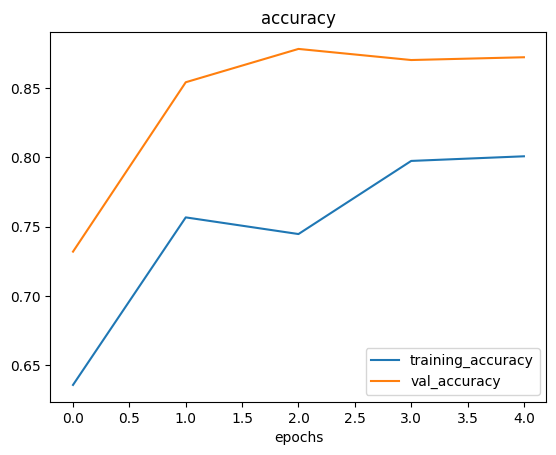

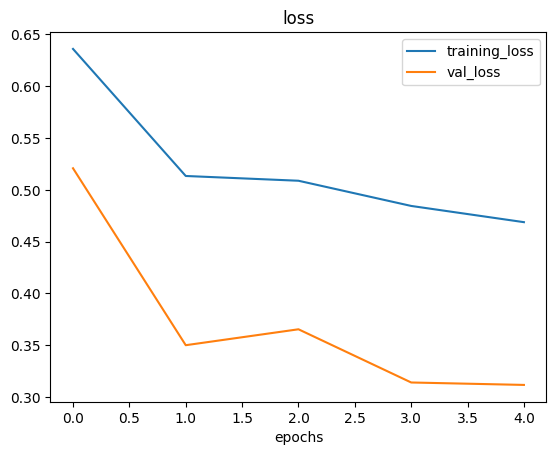

In [54]:
# Plot training curves
plot_loss_curves(history_8)

# Making a prediction with our trained model on our own customed data

In [55]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


--2023-09-26 13:24:28--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.01s   

2023-09-26 13:24:28 (175 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



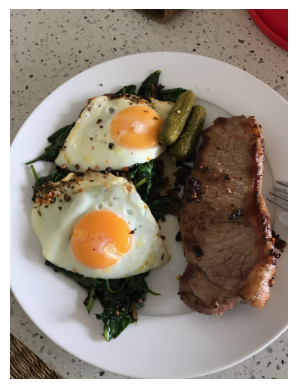

In [56]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [57]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

> 🔑**Note:** When you train a neural network and you want to make a prediction with it on your won custom data, it's important that your custom_data (or new data) is preprocessed into the same format as the data your model was trained on


In [58]:
img=tf.io.read_file("03-steak.jpeg")
tf.image.decode_image(img)

<tf.Tensor: shape=(4032, 3024, 3), dtype=uint8, numpy=
array([[[162, 158, 149],
        [163, 159, 150],
        [165, 161, 152],
        ...,
        [134,  18,  21],
        [138,  22,  25],
        [138,  22,  25]],

       [[163, 159, 150],
        [163, 159, 150],
        [164, 160, 151],
        ...,
        [130,  14,  17],
        [131,  15,  18],
        [134,  18,  21]],

       [[165, 161, 152],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [133,  16,  22],
        [132,  15,  21],
        [133,  16,  22]],

       ...,

       [[151, 131, 107],
        [140, 120,  96],
        [ 99,  81,  59],
        ...,
        [164, 155, 146],
        [151, 142, 133],
        [139, 130, 121]],

       [[139, 117,  93],
        [136, 116,  91],
        [103,  85,  61],
        ...,
        [156, 147, 138],
        [141, 131, 122],
        [138, 128, 119]],

       [[146, 125,  98],
        [147, 127, 100],
        [113,  93,  69],
        ...,
        [152, 143, 

In [59]:
# Create a function to import the image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it to (img_shape, img_shape, colour_channels)
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image (get all values betwenn 0 and 1)
  img = img/255.
  return img


In [60]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

We are expanding the dimension becoz we also have a batch_size parameter. So our data is trained on a tensor of dimension 4. (32,224,224,3)

In [61]:
pred = model_8.predict(tf.expand_dims(steak,axis=0))

1/1 [==============================] - 0s 293ms/step


Our model is predicting probabilities

In [62]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [63]:
# Index the predicted class by rounding te prediction probability and indexing it on the class name
pred_class = class_names[int(tf.round(pred))]

In [89]:
def pred_and_plot(model, filename, class_names = class_names):
  """
  Imports an image located at filename, makes a prediction with model and plots the image with the predicted class as the title
  """

  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Add in logic for multi-class
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)


1/1 [==============================] - 0s 33ms/step


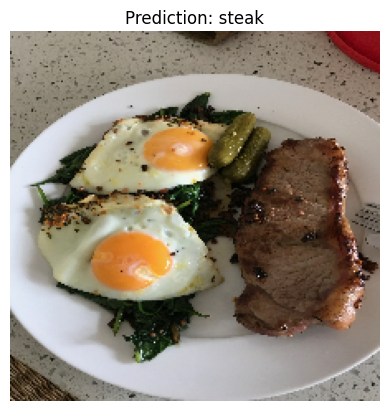

In [65]:
# Test our model on a custom image
pred_and_plot(model_8,"03-steak.jpeg")

--2023-09-26 13:24:33--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.02s   

2023-09-26 13:24:33 (176 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 [==============================] - 0s 124ms/step


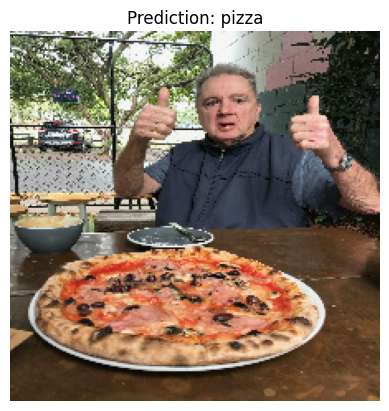

In [66]:
# Download another test image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, "03-pizza-dad.jpeg", class_names)

# Multi-class Image Classification

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model
4. Fit the model(overfit it to make sure it works)
5. Evaluate the model
6. Adjust the different hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied


### 1. Import and become one with the data

In [67]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
# unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

--2023-09-26 13:24:34--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.207, 64.233.170.207, 142.251.175.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  24.4MB/s    in 22s     

2023-09-26 13:24:56 (23.0 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [68]:
import os

# Walkthrough 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.

In [69]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train"
test_dir = "10_food_classes_all_data/test"

In [70]:
# Let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (384, 512, 3)


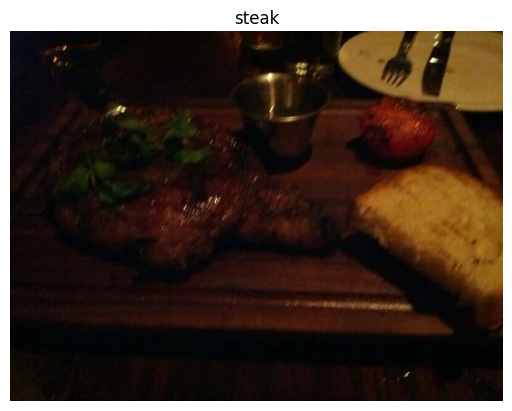

In [71]:
# Visualize
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

## 2. Preprocess the data (prepare it for the model)

In [72]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size = 32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size=(224,224),
                                               batch_size = 32,
                                               class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## 3. Create the model

In [73]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.models import Sequential

# Create our model (a clone of model_8, except to be multi-class)
model_9 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax")
])

# Compile the model
model_9.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

## Fit the model

In [74]:
# Fit the model
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 31s 125ms/step - loss: 2.1985 - accuracy: 0.1805 - val_loss: 2.1128 - val_accuracy: 0.2092
Epoch 2/5
235/235 [==============================] - 38s 162ms/step - loss: 1.9703 - accuracy: 0.3137 - val_loss: 2.0008 - val_accuracy: 0.2828
Epoch 3/5
235/235 [==============================] - 31s 133ms/step - loss: 1.6165 - accuracy: 0.4488 - val_loss: 2.0764 - val_accuracy: 0.3060
Epoch 4/5
235/235 [==============================] - 32s 135ms/step - loss: 1.0903 - accuracy: 0.6384 - val_loss: 2.3818 - val_accuracy: 0.2888
Epoch 5/5
235/235 [==============================] - 41s 173ms/step - loss: 0.5548 - accuracy: 0.8216 - val_loss: 3.3727 - val_accuracy: 0.2604


## 5. Evaluate the model

In [75]:
# Evaluate on the test data
model_9.evaluate(test_data)

79/79 [==============================] - 9s 116ms/step - loss: 3.3727 - accuracy: 0.2604


[3.372676134109497, 0.2603999972343445]

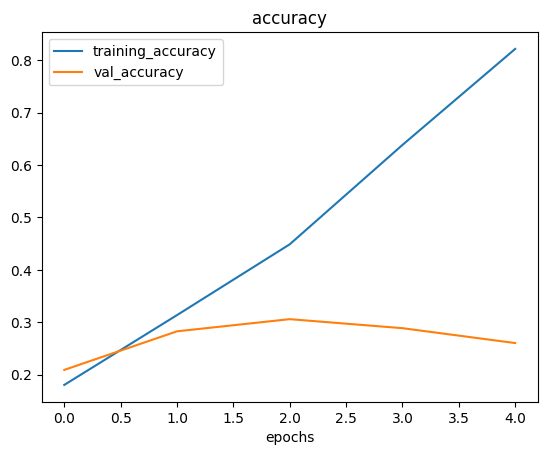

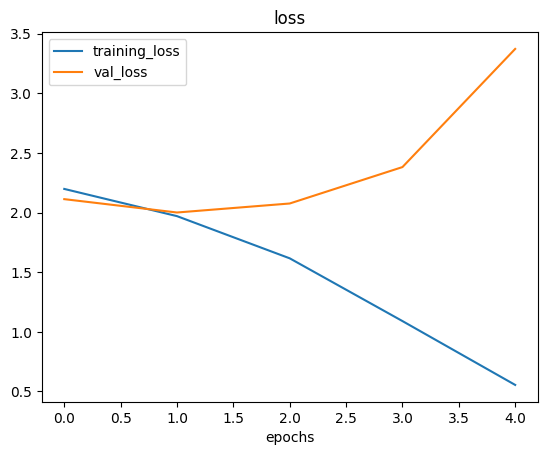

In [76]:
 # Check out the model's loss curves on the 10 classes
 plot_loss_curves(history_9)

What do these loss curves tell us?

Well...it seems our model is **overfitting** the training set quite badly...in other words, it's getting great results on the training data but fails t generalize well to unseen data and performs poorly on the test dataset

## 6. Adjust the model hyperparameters (to beat the baseline/reduce overfitting)

Let's try and fix overfitting by...

* **Get more data** - having more data gives a model more opportunity to learn diverse patterms...
* **Simplify the model** - if our current model is overfitting the data, it maybe too compilcated of a mode, one way to simplify a model is to: reduce # of layers or reduce # hidden units in layers
* **Use data augmentation** - data augmentation manipulates the training data in such a way to add more diversity to it (without altering the original data)
* **Use transfer learning** - transfer learning leverages the patterns another model has learned on similar data to your own and allows you to use those patterns on your own dataset

In [78]:
model_9.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_21 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 110, 110, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_23 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 53, 53, 10)        0         
 ng2D)                                                

In [77]:
# Try a simplified model (removed two layers)
model_10 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

model_10.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_10 = model_10.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 65s 270ms/step - loss: 2.1236 - accuracy: 0.2349 - val_loss: 1.9626 - val_accuracy: 0.2892
Epoch 2/5
235/235 [==============================] - 32s 138ms/step - loss: 1.6876 - accuracy: 0.4373 - val_loss: 1.9455 - val_accuracy: 0.3124
Epoch 3/5
235/235 [==============================] - 30s 126ms/step - loss: 1.1900 - accuracy: 0.6237 - val_loss: 2.0319 - val_accuracy: 0.3084
Epoch 4/5
235/235 [==============================] - 30s 127ms/step - loss: 0.6508 - accuracy: 0.8108 - val_loss: 2.5767 - val_accuracy: 0.2756
Epoch 5/5
235/235 [==============================] - 39s 164ms/step - loss: 0.2868 - accuracy: 0.9324 - val_loss: 3.1007 - val_accuracy: 0.2956


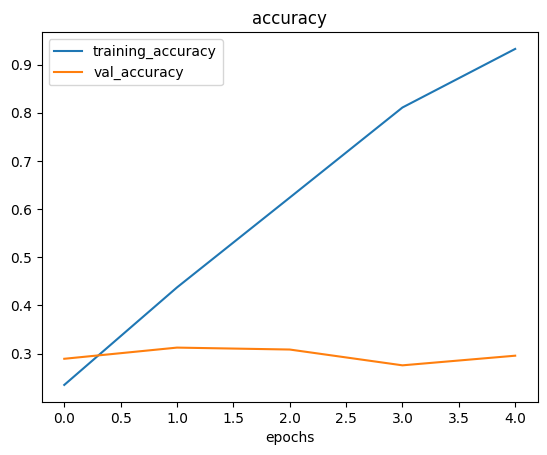

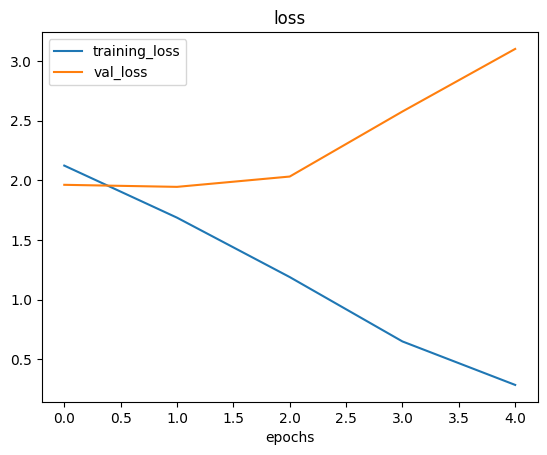

In [79]:
# Check out the loss curves of model_10
plot_loss_curves(history_10)

In [80]:
# Get the model summary
model_10.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 111, 111, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 54, 54, 10)        0         
 ng2D)                                                           
                                                                 
 flatten_9 (Flatten)         (None, 29160)             0         
                                                                 
 dense_14 (Dense)            (None, 10)               

Looks like our "simpilifying the model" experiment didn't work....the val_accuracy went down and overfitting continued...

How about we try data augmentation?

### Trying to reduce overfitting by data augmentation

Let's try and improve our model's results by using augmented trraining data...

Ideally we want to:
  * Reduce overfitting (get the train and validation loss curves closer)
  * Improve validation accuracy

In [81]:
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [82]:
# Clone the model (use the same architecture)
model_11 = tf.keras.models.clone_model(model_10)

# Compile the cloned model (same setup as used for model_10)
model_11.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_11 = model_11.fit(train_data_augmented, # use augmented data
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))


Epoch 1/5
235/235 [==============================] - 118s 491ms/step - loss: 2.2158 - accuracy: 0.1949 - val_loss: 2.0501 - val_accuracy: 0.2596
Epoch 2/5
235/235 [==============================] - 110s 469ms/step - loss: 2.0761 - accuracy: 0.2609 - val_loss: 1.9394 - val_accuracy: 0.3204
Epoch 3/5
235/235 [==============================] - 119s 507ms/step - loss: 2.0077 - accuracy: 0.2991 - val_loss: 1.8637 - val_accuracy: 0.3396
Epoch 4/5
235/235 [==============================] - 136s 578ms/step - loss: 1.9609 - accuracy: 0.3192 - val_loss: 1.7854 - val_accuracy: 0.3812
Epoch 5/5
235/235 [==============================] - 143s 608ms/step - loss: 1.9285 - accuracy: 0.3372 - val_loss: 1.7261 - val_accuracy: 0.4100


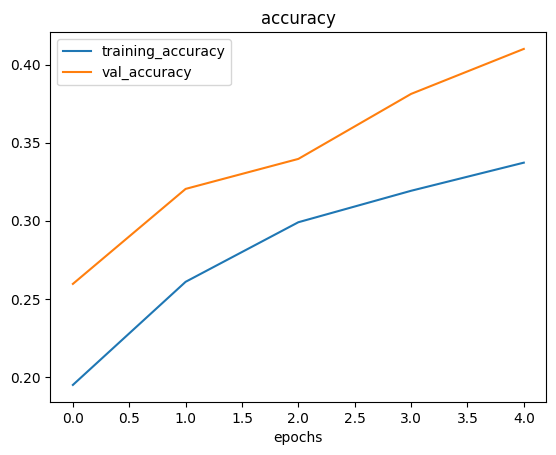

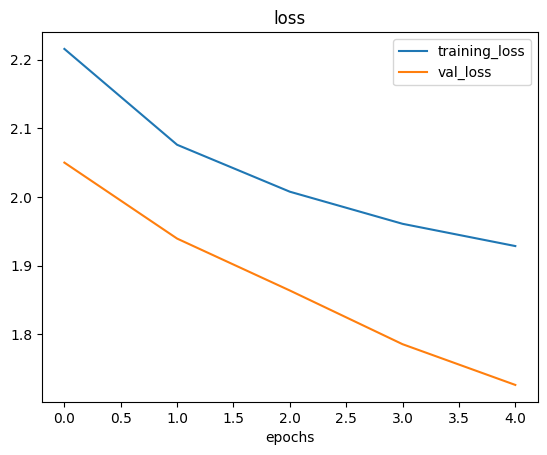

In [84]:
# Check out our model's performance with augmented data
plot_loss_curves(history_11)

Woah! That looks much better, the loss curves are much closer to each other than the baseline model and they look like they're heading in the right direction (certainly not the wrong direction) so if we were to train for longer, we might see further improvements.

## 7. Repeat until satisfied

We could keep going here.
* Restructuring our model's architecture (increasing layers/hidden units)
* Adjusting the learning rate
* Trying different methods of data augmentation
* Training for longer
* Try transfer learning

### Making a prediction with our trained model

Let's use our trained model to make some predictions on our custom images!

In [85]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [86]:
# Download some custom images
# q is for "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/

1/1 [==============================] - 0s 21ms/step


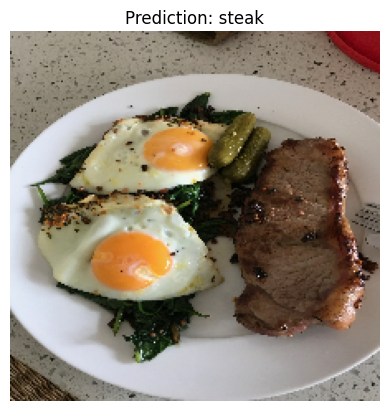

In [91]:
# Make a prediction using model_11
pred_and_plot(model=model_11,
              filename="03-steak.jpeg",
              class_names=class_names)

1/1 [==============================] - 0s 22ms/step


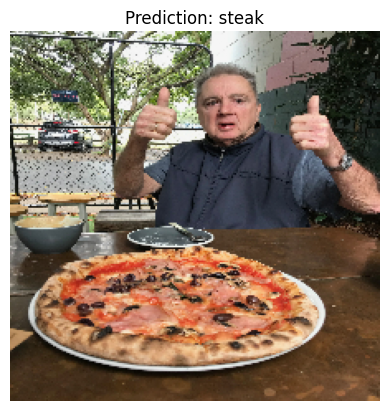

In [92]:
pred_and_plot(model=model_11,
              filename="03-pizza-dad.jpeg",
              class_names=class_names)

1/1 [==============================] - 0s 21ms/step


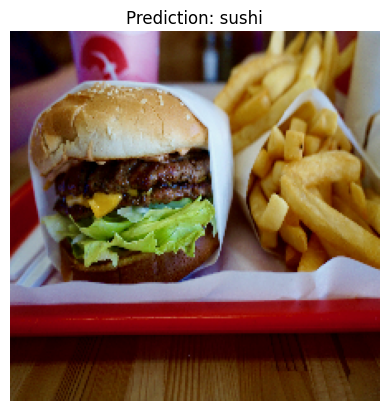

In [93]:
pred_and_plot(model=model_11,
              filename="03-hamburger.jpeg",
              class_names=class_names)

## Saving and loading our model

In [96]:
# Save the model
model_11.save("saved_trained_model_11")

In [97]:
# Load in a trained model and evaluate it
loaded_model_11 = tf.keras.models.load_model("saved_trained_model_11")
loaded_model_11.evaluate(test_data)

79/79 [==============================] - 8s 95ms/step - loss: 1.7261 - accuracy: 0.4100


[1.7260533571243286, 0.4099999964237213]

In [98]:
# Compare our loaded model to our existing model
model_11.evaluate(test_data)==loaded_model_11.evaluate(test_data)

79/79 [==============================] - 7s 85ms/step - loss: 1.7261 - accuracy: 0.4100


False